# 1. Introduction

Welcome to this notebook where we will venture into the world of Machine Learning with one of its simplest, yet powerful techniques: Linear Regression. Here, we will predict the median price of homes in various Boston neighborhoods, using the widely-used Boston Housing dataset. This is a regression task, meaning we are trying to predict a continuous value (house prices) rather than a discrete label (e.g., spam or not-spam). Let's dive right in!

# 2. Importing the Necessary Libraries

As a good practice, we always start by importing all the libraries we'll need at the top. This makes it clear what our dependencies are, and ensures we have everything we need before we start coding.

In [91]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Loading the Dataset

Now, let's load the Boston Housing dataset.

In [7]:
data = pd.read_csv("../data/boston_housing.csv")

# 4. Preprocessing of the data ( if necessary )

In [8]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


# 5. Exploratory Data Analysis ( EDA )

Before we dive into modeling, it's a good idea to explore our dataset. This can include looking at the raw data, checking for missing values, visualizing the distributions of variables, and understanding the relationships between different variables. See at `cheatsheets/EDA.md` for a Cheat Sheet on all the basic things to look for.

In [9]:
# Get the number of rows and columns
print('Shape:', data.shape)

# Display the first few rows of the dataset
print('First few entries:')
print(data.head())

Shape: (506, 14)
First few entries:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [10]:
# Get descriptive statistics
print('Descriptive Statistics:')
print(data.describe())

Descriptive Statistics:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
std

In [11]:
# Check for missing values
print('Missing Values:')
print(data.isnull().sum())

Missing Values:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [14]:
# Check data types of each column
print('Data Types:')
print(data.dtypes)

Data Types:
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [15]:
# Get unique values for each column (useful for categorical data)
print('Unique values:')
for col in data.columns:
    print(col, ':', len(data[col])

Unique values:
CRIM : 485
ZN : 27
INDUS : 77
CHAS : 3
NOX : 81
RM : 446
AGE : 349
DIS : 412
RAD : 9
TAX : 66
PTRATIO : 46
B : 357
LSTAT : 439
MEDV : 229


In [19]:
# Generate a correlation matrix
print('Correlation Matrix:')
corr = data.corr()
print(corr)

Correlation Matrix:
             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.191178  0.401863 -0.054355  0.417130 -0.219150  0.354342   
ZN      -0.191178  1.000000 -0.531871 -0.037229 -0.513704  0.320800 -0.563801   
INDUS    0.401863 -0.531871  1.000000  0.059859  0.764866 -0.390234  0.638431   
CHAS    -0.054355 -0.037229  0.059859  1.000000  0.075097  0.104885  0.078831   
NOX      0.417130 -0.513704  0.764866  0.075097  1.000000 -0.302188  0.731548   
RM      -0.219150  0.320800 -0.390234  0.104885 -0.302188  1.000000 -0.247337   
AGE      0.354342 -0.563801  0.638431  0.078831  0.731548 -0.247337  1.000000   
DIS     -0.374166  0.656739 -0.711709 -0.093971 -0.769230  0.205246 -0.744844   
RAD      0.624765 -0.310919  0.604533  0.001468  0.611441 -0.209847  0.458349   
TAX      0.580595 -0.312371  0.731055 -0.032304  0.668023 -0.292048  0.509114   
PTRATIO  0.281110 -0.414046  0.390954 -0.111304  0.188933 -0.355501  0.269226   
B       

<Axes: >

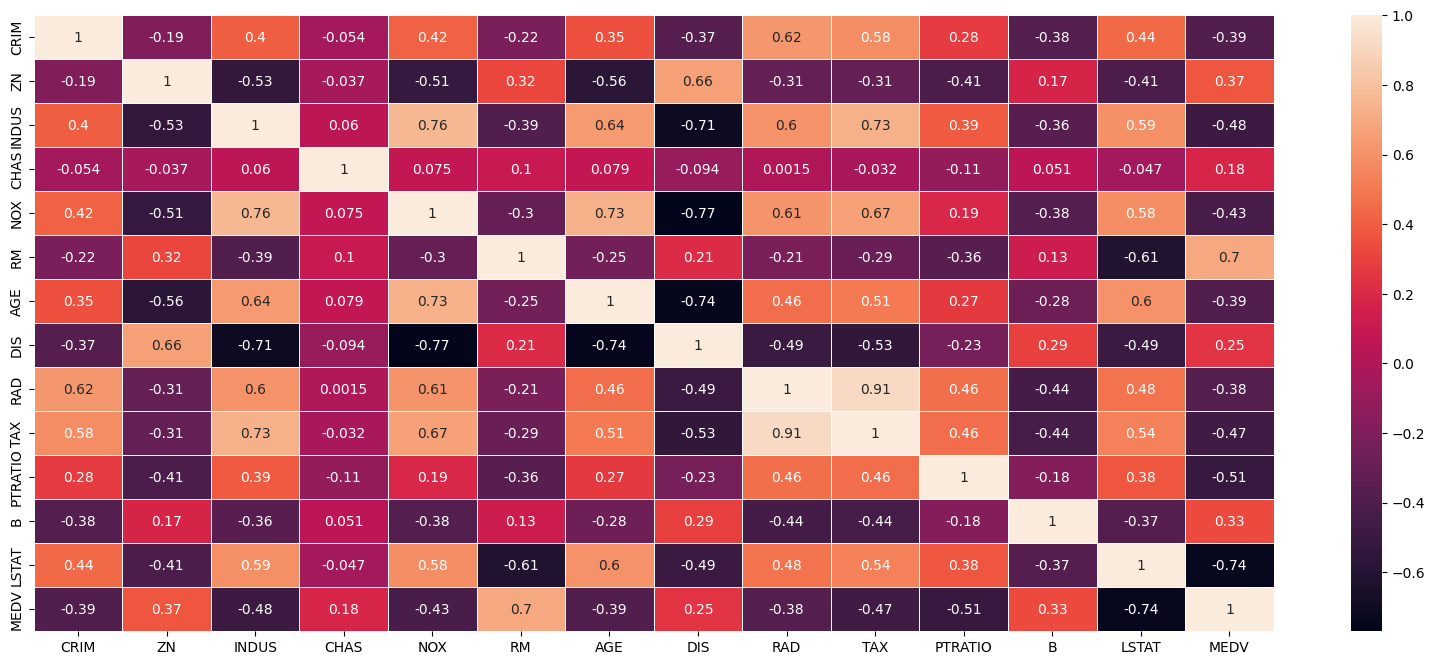

In [28]:
# Create heatmap to visualize the correlation matrix
fig, ax = plt.subplots(figsize=(20,8)) # Adjust figsize for the heatmap to make all values easily readable
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

<Axes: >

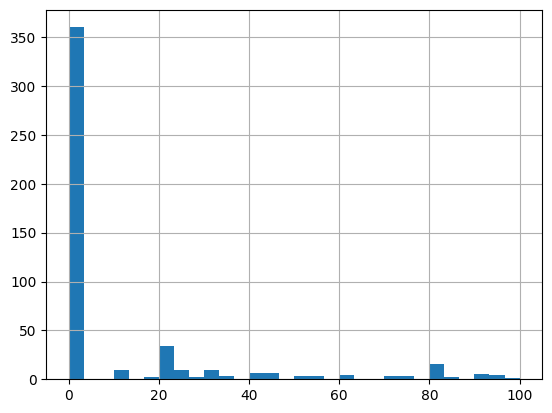

In [38]:
# Histograms or Box-plots for continuous variables
data['ZN'].hist(bins=30)  # Change 'column_name' with your column

<Axes: xlabel='LSTAT', ylabel='MEDV'>

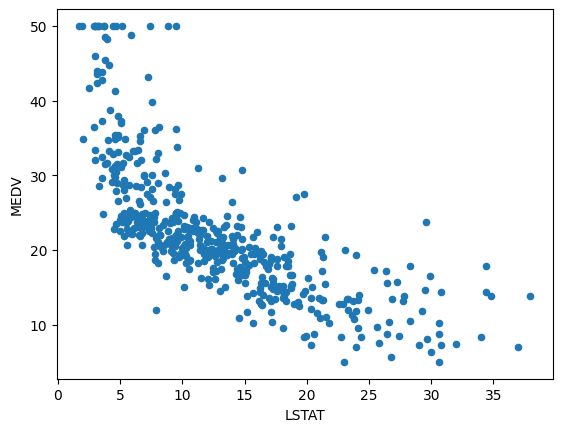

In [35]:
# Scatter plots for relationship between continuous variables --> NEGATIVELY CORRELATED
data.plot(kind='scatter', x='LSTAT', y='MEDV')  # Change 'column1' and 'column2' with your columns

<Axes: xlabel='RM', ylabel='MEDV'>

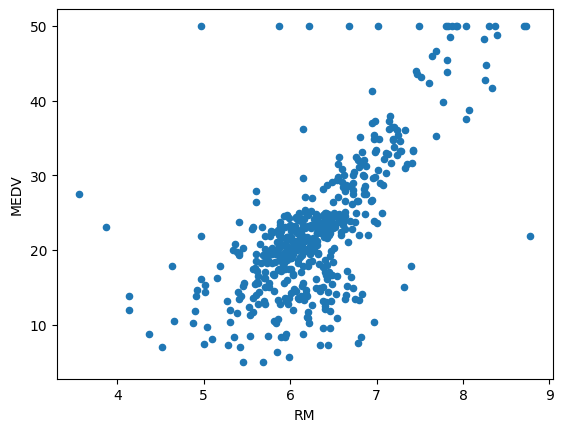

In [36]:
# Scatter plots for relationship between continuous variables --> POSITIVELY CORRELATED
data.plot(kind='scatter', x='RM', y='MEDV')  # Change 'column1' and 'column2' with your columns

In [62]:
# Z-score method
from scipy.stats import zscore
z_scores = zscore(data['NOX'])  # Change 'column_name' with your column
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
new_data = data[filtered_entries]
new_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# 6. Data Preprocessing

Before we dive into modeling, it's a good idea to explore our dataset. This can include looking at the raw data, checking for missing values, visualizing the distributions of variables, and understanding the relationships between different variables. See at `cheatsheets/Preprocessing.md` for a Cheat Sheet on all the basic things to look for.

In [85]:
# Split in X and y with y being the column we're trying to predict
X = data.drop(columns=["MEDV"])
y = data["MEDV"]

In [86]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
# Handle missing values (e.g., dropna)
X_train.dropna(inplace=True)
y_train = y_train.loc[X_train.index]

X_test.dropna(inplace=True)
y_test = y_test.loc[X_test.index]

In [88]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. Model Implementation

Finally, we come to the heart of our notebook: implementing the Linear Regression model! We'll fit the model to our training data and make predictions on our testing data.

In [89]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

# 8. Model Evaluation

After we've made our predictions, we need to evaluate how well our model did. This will usually involve some sort of error metric, like Mean Absolute Error (MAE), Mean Squared Error (MSE), or Root Mean Squared Error (RMSE).

In [92]:

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 3.2790602574129375
Mean Squared Error: 28.28169144322032
R² Score: 0.6494619839933351


# 9. Conclusion

In this final section, we'll recap what we've done and learned in this notebook. We might also discuss what we could do in future projects or how we could improve our current model.

Remember, these are just guidelines. Your notebook should reflect your own style and approach to data science. The most important thing is that your notebook is clear, logical, and informative. Happy coding!

Note: You can insert these section headings into your Jupyter notebook by changing a cell's type to "Markdown" and typing in the text. You can run a markdown cell in the same way you'd run a code cell (Shift+Enter).

Overall, these results indicate a decent fit but suggest that there might be room for improvement. You could consider trying different preprocessing techniques, feature engineering, or experimenting with different models to see if you can enhance performance. Some of the advanced regression techniques like Ridge or Lasso regression might also be worth exploring, as they can sometimes provide better results, especially if there's multicollinearity among the features.